<a href="https://colab.research.google.com/github/mgm79/AI-Institute-June-2024-Workshop/blob/main/HouseZero_ML_Workshop_Hackathon_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Workshop Hackathon: HouseZero

# Synapse

Task 5

[Login](https://www.synapse.org/LoginPlace:0)

[Submission Platform](https://www.synapse.org/Synapse:syn52052735/wiki/622928)

Project SynID: syn52052735

## Overview

[Video](https://www.youtube.com/watch?v=z7LkdcskNBU)

The Harvard Center for Green Buildings and Cities (CGBC) has transformed its headquarters, a pre-1940s building in Cambridge, MA, into HouseZero, an ambitious data-driven living-laboratory. This retrofit aims to meet the most rigorous efficiency standards ever achieved by a building retrofit, functioning as a prototype for ultra-efficiency. HouseZero's performance goals include:

- **Almost zero energy required for heating and cooling** (No HVAC system)
- **100% natural ventilation**
- **100% daylight autonomy** (No daytime electric light)
- **Zero carbon emissions**, including embodied energy in materials

The curated data for HouseZero is aimed at building smart controllers. Initial tasks will focus on predictive models for key system parameters.

## The Data

### Training Data
- **Winter Days**: 2/15 and 2/21
- **Summer Days**: 6/27 and 8/30
- Data Files:
  - **Outdoor Quantities**: 6 time series, 5-minute intervals
  - **Indoor Data**: 8 time series, 1-minute intervals

### Test Data
- **Winter Day**: 2/1
- **Summer Day**: 7/4
- **Note**: CSV files for these days have empty fields to be predicted.

## Questions

### Question 1: Development of a Predictive Thermal Model (Winter)

**Objective**: Develop a predictive model to forecast indoor temperatures using historical weather and building operational data. The model should utilize datasets from two selected summer days (6/27 and 7/4) to predict room and slab temperatures on a third, significantly hotter summer day (8/30). Similarly, data from two winter days (2/15 and 2/21) should be used to predict temperatures on a the withheld winter day (2/1).

**Inputs**:
- **Outdoor Conditions** (5-minute increments):
  - Outdoor Air Temperature
  - Outdoor Relative Humidity
  - Wind Direction
  - Wind Speed
  - Solar Radiation
- **Building Operational Conditions** (1-minute increments):
  - Water Supply Temperature
  - Water Return Temperature
  - Valve Opening (%)
  - Window Opening (%)

**Outputs** (1-minute increments):
- **Room Temperature** (Error: E1)
- **Slab Temperature** (Error: E2)
- **File to upload**: Q1.npy (1439 rows, 2 columns)

### Question 2: Indoor Air Quality and Temperature Control System (Winter)

**Objective**: Utilize the dataset to simulate a control system that manages indoor air quality and temperature. Focus on how interactions among CO2 levels, room temperature, and operations of windows and valves impact the indoor environment. Using data from 2 summer days and 2 winter days, predict the variations in indoor air temperature and CO2 levels for time intervals of 6 hours, 12 hours, and 24 hours on unseen days.


**Inputs**:
- **Outdoor Conditions**:
  - Outdoor Air Temperature
  - Outdoor Relative Humidity
  - Wind Direction
  - Wind Speed
  - Solar Radiation
- **Indoor Conditions**:
  - Water Supply Temperature
  - Water Return Temperature
  - Indoor Relative Humidity
  - Slab Temperature (predicted from Question 1)
  - Valve Opening (%)
  - Window Opening (%)

**Outputs** (1-minute increments):
- **Room Temperature** (Error: E3)
- **CO2 Level variation** (Error: E4)
- **File to upload**: Q2.npy (1439 rows, 2 columns)

### Question 3: Development of a Predictive Thermal Model (Summer)

**Objective**: Repeat the experiments of Question 1, but now with summer training data (6/27 and 8/30) to predict withheld summer day (7/4).


**Outputs** (1-minute increments):
- **Room Temperature** (Error: E5)
- **Slab Temperature** (Error: E6)
- **File to upload**: Q3.npy (1439 rows, 2 columns)

### Question 4: Indoor Air Quality and Temperature Control System (Summer)

**Objective**: Repeat the experiments of Question 2, but now with summer training data (6/27 and 8/30) to predict withheld summer day (7/4).

**Outputs** (1-minute increments):
- **Room Temperature** (Error: E7)
- **CO2 Level variation** (Error: E8)
- **File to upload**: Q4.npy (1439 rows, 2 columns)

# Setup Enviroment

In [ ]:
%%writefile /content/requirements.txt
numpy
pandas
matplotlib
scikit-learn
scipy
pycaret

Writing /content/requirements.txt


In [ ]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except ModuleNotFoundError:
    !yes | pip install -r /content/requirements.txt -q -q -q --exists-action i
    what_is_installed()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 

# Exploratory Data Analysis (EDA) and Data Cleaning

In [ ]:
# @title Load Data
import pandas as pd

# Load the indoor and outdoor data
indoor_data = pd.read_csv('https://raw.githubusercontent.com/mgm79/AI-Institute-June-2024-Workshop/main/Train_HZ_Indoor.csv')
outdoor_data = pd.read_csv('https://raw.githubusercontent.com/mgm79/AI-Institute-June-2024-Workshop/main/Train_HZ_outdoor.csv')

# Convert the timezone-aware datetime objects to UTC
indoor_data['Timestamp'] = pd.to_datetime(indoor_data['Timestamp'], utc=True)
outdoor_data['Timestamp'] = pd.to_datetime(outdoor_data['Timestamp'], utc=True)

# separate timestamp into Date	Time columns
indoor_data['Date'] = indoor_data['Timestamp'].dt.date
indoor_data['Time'] = indoor_data['Timestamp'].dt.time
outdoor_data['Date'] = outdoor_data['Timestamp'].dt.date
outdoor_data['Time'] = outdoor_data['Timestamp'].dt.time

# Set the Timestamp column as the index for data
indoor_data.set_index(['Date','Time'], inplace=True)
outdoor_data.set_index(['Date','Time'], inplace=True)

# Now, add categorical features from date such as month, day, and season (summer or winter)

# For indoor data
indoor_data['Month'] = indoor_data['Timestamp'].dt.month
indoor_data['Day'] = indoor_data['Timestamp'].dt.day
indoor_data['Season'] = indoor_data['Timestamp'].dt.month.map(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer')

# # For outdoor data
# outdoor_data['Month'] = outdoor_data['Timestamp'].dt.month
# outdoor_data['Day'] = outdoor_data['Timestamp'].dt.day
# outdoor_data['Season'] = outdoor_data['Timestamp'].dt.month.map(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer')

In [ ]:
# Display the first few rows of each dataset
indoor_data.head(2)

Timestamp  Water_Return_Temp  \
Date       Time                                                    
2022-06-27 04:00:00 2022-06-27 04:00:00+00:00          20.116620   
           04:01:00 2022-06-27 04:01:00+00:00          20.104387   

                     Water_Supply_Temp   CO2 (ppm)     RH (%)  Room_temp  \
Date       Time                                                            
2022-06-27 04:00:00          17.946960  473.920013  50.919998  23.959999   
           04:01:00          17.937003  468.799988  50.919998  23.959999   

                     slab_temp  valve_opening (%)  window_opening (%)  Month  \
Date       Time                                                                
2022-06-27 04:00:00  19.899996                100                 0.0      6   
           04:01:00  19.899996                100                 0.0      6   

                     Day  Season  
Date       Time                   
2022-06-27 04:00:00   27  Summer  
           04:01:00   27  Summer

In [ ]:
outdoor_data.head(2)

Timestamp  Air temperature (gund, ℃)  \
Date       Time                                                            
2022-06-27 00:00:00 2022-06-27 00:00:00+00:00                      22.18   
           00:05:00 2022-06-27 00:05:00+00:00                      22.13   

                     Relative humidity (gund, %)  Wind direction (gund, °)  \
Date       Time                                                              
2022-06-27 00:00:00                         63.7                       233   
           00:05:00                         63.0                       229   

                     Wind speed (gund, m/s)  Pressure (gund, mbar)  \
Date       Time                                                      
2022-06-27 00:00:00                     1.0                 1011.9   
           00:05:00                     2.0                 1011.9   

                     Solar radiation (gund, W/m^2)  
Date       Time                                     
2022-06-27 00:00:00                              1  
           00:05:00                              1

In [ ]:
# Display basic information about the datasets
print("Indoor Data Info:")
print(indoor_data.info())
print("\nOutdoor Data Info:")
print(outdoor_data.info())

Indoor Data Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8640 entries, (datetime.date(2022, 6, 27), datetime.time(4, 0)) to (datetime.date(2023, 2, 22), datetime.time(4, 59))
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Timestamp           8640 non-null   datetime64[ns, UTC]
 1   Water_Return_Temp   8640 non-null   float64            
 2   Water_Supply_Temp   8640 non-null   float64            
 3   CO2 (ppm)           5760 non-null   float64            
 4   RH (%)              8640 non-null   float64            
 5   Room_temp           5760 non-null   float64            
 6   slab_temp           5760 non-null   float64            
 7   valve_opening (%)   8640 non-null   int64              
 8   window_opening (%)  8640 non-null   float64            
 9   Month               8640 non-null   int32              
 10  Day                 8640 non-null   int32   

In [ ]:
def create_combined_df(indoor_data, outdoor_data, month_range_arg=[2,2], date_range_arg=[15, 21]):
  """
  Creates a combined DataFrame from indoor and outdoor data for specific dates.

  Args:
    indoor_data: DataFrame containing indoor data.
    outdoor_data: DataFrame containing outdoor data.

  Returns:
    DataFrame containing combined indoor and outdoor data for specific dates.
  """
  # Filter data for specific dates
  indoor_filtered = indoor_data[
      (indoor_data["Timestamp"].dt.month.isin(month_range_arg)) & (indoor_data["Timestamp"].dt.day.isin(date_range_arg))
  ]
  outdoor_filtered = outdoor_data[
      (outdoor_data["Timestamp"].dt.month.isin(month_range_arg)) & (outdoor_data["Timestamp"].dt.day.isin(date_range_arg))
  ]

  # Merge indoor and outdoor data
  combined_df = pd.merge(
      indoor_filtered, outdoor_filtered, on=["Timestamp"], how="outer"
  )
  combined_df.set_index(["Timestamp"], inplace=True) #.fillna(method="ffill", inplace=True)

  return combined_df

In [ ]:
def interpolate_time_based(df, columns_to_interpolate_arg=['Air temperature (gund, ℃)','Relative humidity (gund, %)','Wind direction (gund, °)','Wind speed (gund, m/s)','Pressure (gund, mbar)','Solar radiation (gund, W/m^2)']):
    """
    Fills in missing values using time-based interpolation for specific columns.

    Args:
        df (pd.DataFrame): The input DataFrame with a DateTime index.

    Returns:
        pd.DataFrame: The DataFrame with missing values interpolated.
    """
    # Ensure the DataFrame has a DateTime index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        raise ValueError("DataFrame must have a DateTime index")

    # Columns to interpolate
    columns_to_interpolate = columns_to_interpolate_arg

    # Interpolate missing values for each specified column
    for column in columns_to_interpolate:
        if column in df.columns:
            df[column] = df[column].interpolate(method='time')

    return df

In [ ]:
feb_15_21_df = create_combined_df(
    indoor_data, outdoor_data,
    month_range_arg=[2,2],
    date_range_arg=[15, 21])
filled_feb_15_21_df = interpolate_time_based(feb_15_21_df)

In [ ]:
feb_1_df = create_combined_df(
    indoor_data, outdoor_data,
    month_range_arg=[2,2],
    date_range_arg=[0, 1])
filled_feb_1_df = interpolate_time_based(feb_1_df)

In [ ]:
filled_feb_15_21_df.head(2)

,Water_Return_Temp,Water_Supply_Temp,CO2 (ppm),RH (%),Room_temp,slab_temp,valve_opening (%),window_opening (%),Month,Day,Season,"Air temperature (gund, ℃)","Relative humidity (gund, %)","Wind direction (gund, °)","Wind speed (gund, m/s)","Pressure (gund, mbar)","Solar radiation (gund, W/m^2)"
Timestamp,,,,,,,,,,,,,,,,,
2023-02-15 05:00:00+00:00,21.776009,21.805106,639.359985,27.120001,22.34,21.599998,0.0,0.0,2.0,15.0,Winter,3.49,67.9,142.0,0.0,1017.5,1.0
2023-02-15 05:01:00+00:00,21.764806,21.796756,639.359985,27.120001,22.34,21.599998,0.0,0.0,2.0,15.0,Winter,3.49,67.9,140.2,0.0,1017.5,1.0


In [ ]:
from datetime import time
def timestamp_range(df):
  # summarize the timestamp range of the dataframe
  print("timestamp range of the dataframe: ",df.index.min(), df.index.max())

timestamp_range(filled_feb_15_21_df)

timestamp range of the dataframe:  2023-02-15 00:00:00+00:00 2023-02-21 23:59:00+00:00


# Question 1: Development of a Predictive Thermal Model (Winter)

**Objective**: Develop a predictive model to forecast indoor temperatures using historical weather and building operational data. The model should utilize datasets from two selected summer days (6/27 and 7/4) to predict room and slab temperatures on a third, significantly hotter summer day (8/30). Similarly, data from two winter days (2/15 and 2/21) should be used to predict temperatures on a the withheld winter day (2/1).

**Inputs**:
- **Outdoor Conditions** (5-minute increments):
  - Outdoor Air Temperature
  - Outdoor Relative Humidity
  - Wind Direction
  - Wind Speed
  - Solar Radiation
- **Building Operational Conditions** (1-minute increments):
  - Water Supply Temperature
  - Water Return Temperature
  - Valve Opening (%)
  - Window Opening (%)

**Outputs** (1-minute increments):
- **Room Temperature** (Error: E1)
- **Slab Temperature** (Error: E2)
- **File to upload**: Q1.npy (1439 rows, 2 columns)

In [ ]:
def filter_columns(df, columns_to_keep):
    """
    Create a new DataFrame from an old DataFrame by dropping all columns except those in the specified list.

    Parameters:
    df (pd.DataFrame): The original DataFrame.
    columns_to_keep (list): The list of columns to keep in the new DataFrame.

    Returns:
    pd.DataFrame: A new DataFrame containing only the specified columns.
    """
    # Ensure the columns_to_keep are in the original DataFrame
    columns_to_keep = [col for col in columns_to_keep if col in df.columns]

    # Create a new DataFrame with only the specified columns
    new_df = df[columns_to_keep]

    return new_df

In [ ]:
indoor_data.columns

Index(['Timestamp', 'Water_Return_Temp', 'Water_Supply_Temp', 'CO2 (ppm)',
       'RH (%)', 'Room_temp', 'slab_temp', 'valve_opening (%)',
       'window_opening (%)', 'Month', 'Day', 'Season'],
      dtype='object')

In [ ]:
outdoor_data.columns

Index(['Timestamp', 'Air temperature (gund, ℃)', 'Relative humidity (gund, %)',
       'Wind direction (gund, °)', 'Wind speed (gund, m/s)',
       'Pressure (gund, mbar)', 'Solar radiation (gund, W/m^2)'],
      dtype='object')

In [ ]:
filtered_indoor_data = filter_columns(indoor_data, ['Timestamp','Water_Supply_Temp', 'Water_Return_Temp', 'valve_opening (%)', 'window_opening (%)', 'Room_temp', 'slab_temp', 'Season'])
filtered_outdoor_data = filter_columns(outdoor_data, ['Timestamp','Air temperature (gund, ℃)', 'Relative humidity (gund, %)', 'Wind direction (gund, °)', 'Wind speed (gund, m/s)', 'Solar radiation (gund, W/m^2)', 'Season'])

In [ ]:
filtered_indoor_data.columns

Index(['Timestamp', 'Water_Supply_Temp', 'Water_Return_Temp',
       'valve_opening (%)', 'window_opening (%)', 'Room_temp', 'slab_temp',
       'Season'],
      dtype='object')

In [ ]:
filtered_outdoor_data.columns

Index(['Timestamp', 'Air temperature (gund, ℃)', 'Relative humidity (gund, %)',
       'Wind direction (gund, °)', 'Wind speed (gund, m/s)',
       'Solar radiation (gund, W/m^2)'],
      dtype='object')

In [ ]:
input_df = create_combined_df(filtered_indoor_data, filtered_outdoor_data, month_range_arg=[2,8], date_range_arg=[1, 30])

<Axes: xlabel='Timestamp'>

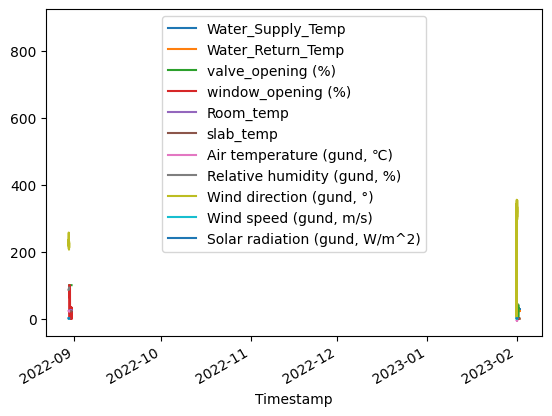

In [ ]:
input_df.plot()

In [ ]:
input_df.index

DatetimeIndex(['2022-08-30 04:00:00+00:00', '2022-08-30 04:01:00+00:00',
               '2022-08-30 04:02:00+00:00', '2022-08-30 04:03:00+00:00',
               '2022-08-30 04:04:00+00:00', '2022-08-30 04:05:00+00:00',
               '2022-08-30 04:06:00+00:00', '2022-08-30 04:07:00+00:00',
               '2022-08-30 04:08:00+00:00', '2022-08-30 04:09:00+00:00',
               ...
               '2023-02-01 04:11:00+00:00', '2023-02-01 04:16:00+00:00',
               '2023-02-01 04:21:00+00:00', '2023-02-01 04:26:00+00:00',
               '2023-02-01 04:31:00+00:00', '2023-02-01 04:36:00+00:00',
               '2023-02-01 04:41:00+00:00', '2023-02-01 04:46:00+00:00',
               '2023-02-01 04:51:00+00:00', '2023-02-01 04:56:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Timestamp', length=2448, freq=None)

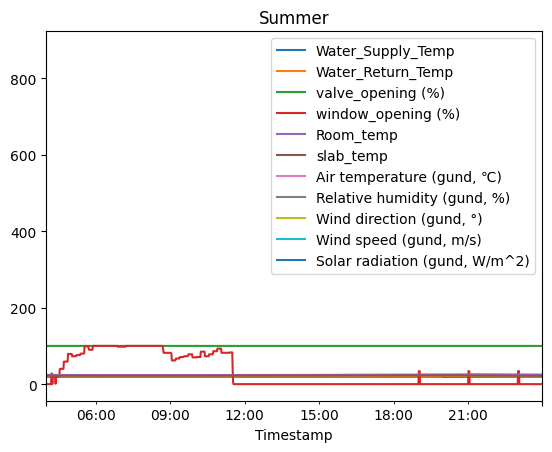

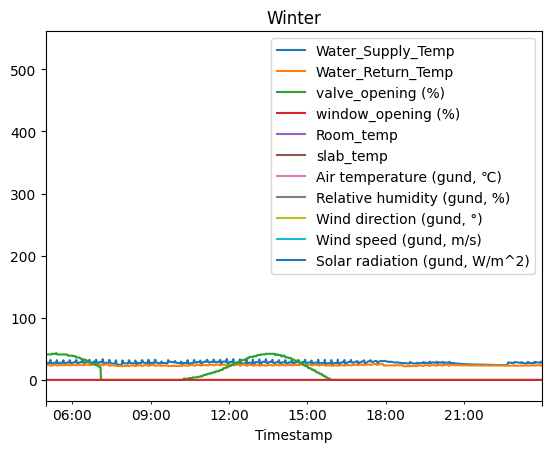

In [ ]:
input_df[input_df['Season']=='Summer'].plot(title="Summer")
input_df[input_df['Season']=='Winter'].plot(title="Winter");

In [ ]:
import pandas as pd

# Step 1: Count NaNs in each column
nan_count_per_column = input_df.isna().sum()

# Step 2: Count NaNs in each row (optional, for detailed analysis)
nan_count_per_row = input_df.isna().sum(axis=1)

# Step 3: Find the percentage of NaNs in each column
nan_percentage_per_column = (nan_count_per_column / len(input_df)) * 100

# Step 4: Identify the locations of NaNs
nan_locations = input_df.isna()

# Create a summary DataFrame for better visualization
nan_profile = pd.DataFrame({
    'NaN Count': nan_count_per_column,
    'NaN Percentage': nan_percentage_per_column
})

# If you want to print the summary to the console
print("NaN Profile Summary")
print(nan_profile)

# To get detailed NaN locations
nan_details = nan_locations[nan_locations == True].stack()

# If you want to print detailed NaN locations to the console
print("Detailed NaN Locations")
print(nan_details)

NaN Profile Summary
                               NaN Count  NaN Percentage
Water_Supply_Temp                    108        4.411765
Water_Return_Temp                    108        4.411765
valve_opening (%)                    108        4.411765
window_opening (%)                   108        4.411765
Room_temp                           1248       50.980392
slab_temp                           1248       50.980392
Season                               108        4.411765
Air temperature (gund, ℃)           1872       76.470588
Relative humidity (gund, %)         1872       76.470588
Wind direction (gund, °)            1872       76.470588
Wind speed (gund, m/s)              1872       76.470588
Solar radiation (gund, W/m^2)       1872       76.470588
Detailed NaN Locations
Timestamp                                               
2022-08-30 04:01:00+00:00  Air temperature (gund, ℃)        True
                           Relative humidity (gund, %)      True
                           Wi

In [ ]:
timestamp_range(input_df)

timestamp range of the dataframe:  2022-08-30 00:00:00+00:00 2023-02-01 23:59:00+00:00
